<a href="https://colab.research.google.com/github/nadireus/Clarusway/blob/main/Assignment_1_DV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# WITH PANDAS AND MATPLOTLIB

In [316]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
import warnings
warnings.filterwarnings('ignore') 

INSTRUCTIONS

1. Number of people by gender
1. Kill weapon
1. Age of killed people
1. Race of killed people
1. Killed People According to Races (Pie Chart)
1. Most common 15 Name or Surname of killed people

<br>

read data

if didn't work you can use this parameters: encoding="windows-1252"

In [319]:
kill = pd.read_csv('PoliceKillingsUS.csv', encoding="windows-1252")

## 1: Plot number of people by gender

In [320]:
kill.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False


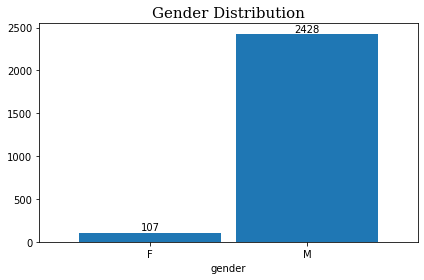

In [297]:
df=kill
groups = df.groupby(['gender']).size()
x=df.groupby(['gender'])
y=df.groupby(['gender']).size()
groups.plot.bar(width=0.91, align='center',stacked=True)
plt.grid(True, which='minor')
font1 = {'family':'serif','color':'black','size':15}
plt.title("Gender Distribution",fontdict = font1)
plt.xticks(rotation=0)
for i in range(len(x)):
    plt.text(i,y[i], y[i],ha='center',va='bottom')
plt.tight_layout()
plt.grid(True, which='minor')

## 2: Plot 7 most common kill weapons

In [304]:
df['armed'].value_counts().head(7)

gun               1398
knife              373
vehicle            177
unarmed            171
undetermined       117
toy weapon         104
unknown weapon      18
Name: armed, dtype: int64

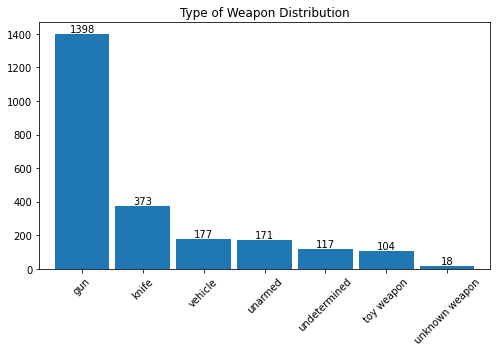

In [305]:
plt.figure(figsize = (7,5))
guns=df['armed'].value_counts().head(7)
x=df['armed'].value_counts().head(7)
y=df['armed'].value_counts().head(7)
bar_width = 5
guns.plot.bar(width=0.9, align='center')
plt.title("Type of Weapon Distribution")
plt.xticks(rotation=45)
for i in range(len(x)):
    plt.text(i,y[i], y[i],ha='center',va='bottom')
plt.tight_layout()

## 3: Plot number of age of killed people under two groups : Under 25 and Above 25

In [306]:
df.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False


In [321]:
df['age'].isnull().sum()

0

In [308]:
a=df['age'].mean()

36.605370219690805

In [309]:
df.replace(np.nan,a, inplace=True)

In [310]:
df['age'].isnull().sum()

0

In [311]:
df['age'].max()

91.0

In [312]:
age_cat=df['age']

bins= [0,25,91]
labels = ['below25','above25']
age_cat= pd.cut(age_cat, bins=bins, labels=labels, right=False)
age_cat


0       above25
1       above25
2       below25
3       above25
4       above25
         ...   
2530    above25
2531    above25
2532    above25
2533    above25
2534    above25
Name: age, Length: 2535, dtype: category
Categories (2, object): ['below25' < 'above25']

In [313]:
age_cat.value_counts()

above25    2084
below25     450
Name: age, dtype: int64

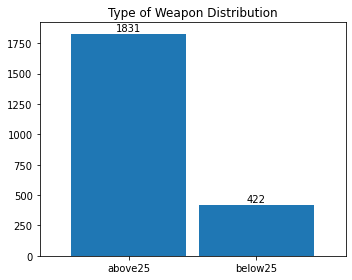

In [269]:
plt.figure(figsize = (5,4))
ages=age_cat.value_counts()
x=age_cat.value_counts()
y=age_cat.value_counts()

ages.plot.bar(width=0.9, align='center')
plt.title("Type of Weapon Distribution")
plt.xticks(rotation=0)
for i in range(len(x)):
    plt.text(i,y[i], y[i],ha='center',va='bottom')
plt.tight_layout()

## 4: Plot number of killed poeple by race

In [122]:
ra= df.groupby(['race']).size()
ra

race
A      39
B     618
H     423
N      31
O      28
W    1201
dtype: int64

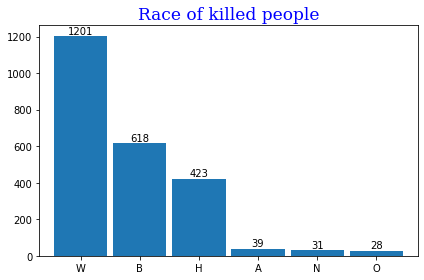

In [136]:
r=df['race'].value_counts()
x=df['race'].value_counts()
y=df['race'].value_counts()

r.plot.bar(width=0.9, align='center')
font1 = {'family':'serif','color':'blue','size':17}
plt.title("Race of killed people", fontdict = font1)
plt.xticks(rotation=0)
for i in range(len(x)):
    plt.text(i,y[i], y[i],ha='center',va='bottom')
plt.tight_layout()

In [180]:
df['race'].value_counts()


W    1201
B     618
H     423
A      39
N      31
O      28
Name: race, dtype: int64

## 5: Killed People According to Races (Pie Chart)

In [138]:
df.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False


In [142]:
df['race'].unique()

array(['A', 'W', 'H', 'B', 'O', nan, 'N'], dtype=object)

In [143]:
df['race'].value_counts()

W    1201
B     618
H     423
A      39
N      31
O      28
Name: race, dtype: int64

Problem: missing value on race column.

**INSTRUCTION-1: Drop the all raws that contain missing value (dropna)**

In [181]:
df.dropna(inplace=True)


In [182]:
df.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False


In [183]:
df.shape

(2254, 14)

**INSTRUCTION-2: Demonstrate Race Ratio of Killed People by a Pie Chart (You can use Matplotlib)**

In [184]:
df['race'].value_counts()

W    1168
B     592
H     401
A      36
N      29
O      28
Name: race, dtype: int64

In [192]:
new=df['race'].value_counts()

In [191]:
df['race'].unique()

array(['A', 'W', 'H', 'B', 'O', 'N'], dtype=object)

In [193]:
new.index

Index(['W', 'B', 'H', 'A', 'N', 'O'], dtype='object')

In [196]:
new.values

array([1168,  592,  401,   36,   29,   28])

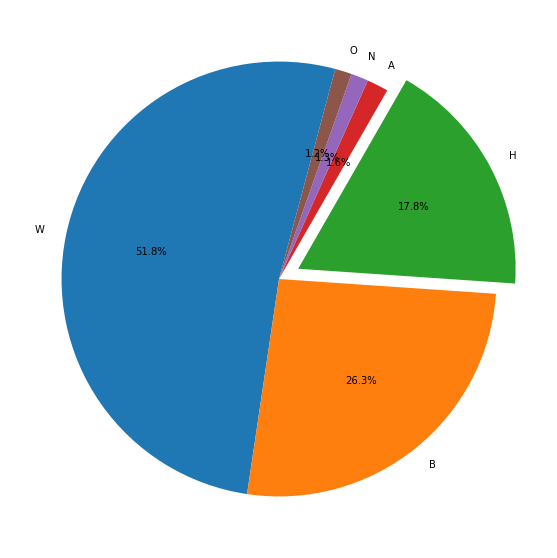

In [229]:
plt.figure(figsize = (20,10))
y = new.values
mylabels = new.index
myexplode = [0, 0, 0.1, 0, 0, 0]
plt.pie(y, labels = mylabels,startangle = 75, explode = myexplode, autopct='%1.1f%%')

plt.show()

In [322]:
df['text'] = df['name']

In [324]:
import pandas as pd
import nltk
import re
import string
from nltk.corpus import stopwords
nltk.download('punkt')
nltk.download('stopwords')
from nltk.tokenize import word_tokenize

stop_words = stopwords.words()

def cleaning(text):        
    # converting to lowercase, removing URL links, special characters, punctuations...
    text = text.lower()
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('[’“”…]', '', text)     

    # removing the emojies               
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    text = emoji_pattern.sub(r'', text)   
    
    # removing the stop-words          
    text_tokens = word_tokenize(text)
    tokens_without_sw = [word for word in text_tokens if not word in stop_words]
    filtered_sentence = (" ").join(tokens_without_sw)
    text = filtered_sentence
    
    return text

dt = df['text'].apply(cleaning)

from collections import Counter
p = Counter(" ".join(dt).split()).most_common(15)
rslt = pd.DataFrame(p, columns=['Word', 'Frequency'])
print(rslt)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
           Word  Frequency
0            tk        104
1       michael         91
2         james         57
3         david         57
4        robert         48
5        joseph         48
6       william         47
7        daniel         46
8          john         42
9   christopher         40
10          lee         38
11        smith         36
12      richard         36
13      anthony         32
14      johnson         32


In [338]:
rslt.set_index('Word', inplace=True)

<Figure size 2880x720 with 0 Axes>

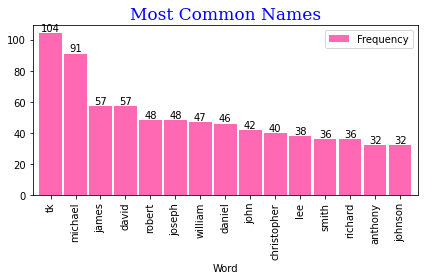

In [350]:

x=rslt
y=rslt['Frequency']
plt.figure(figsize = (40,10))
rslt.plot.bar(width=0.9, align='center', color= 'hotpink')
font1 = {'family':'serif','color':'blue','size':17}
plt.title("Most Common Names", fontdict = font1)
plt.xticks(rotation=90)
for i in range(len(x)):
    plt.text(i,y[i], y[i],ha='center',va='bottom')
plt.tight_layout()